In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime
from tensorflow.keras.models import Sequential

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'name_scope'

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


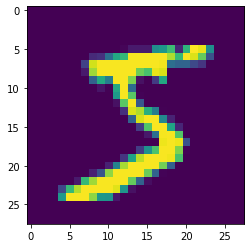

In [2]:
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
plt.imshow(train_images[0])

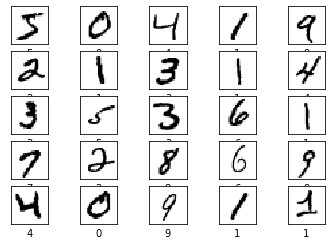

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

plt.show()

In [4]:
model = keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10,activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dropout (Dropout)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8

In [5]:
model.compile(optimizer='Adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [6]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [7]:
print(train_images.shape)
history = model.fit(train_images,train_labels,validation_data=(test_images,test_labels),epochs=20,callbacks=[tensorboard_callback])

(60000, 28, 28)
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 275us/sample - loss: 0.5098 - accuracy: 0.8457 - val_loss: 0.1481 - val_accuracy: 0.9559
Epoch 2/20
60000/60000 [==============================] - 13s 224us/sample - loss: 0.2510 - accuracy: 0.9288 - val_loss: 0.1188 - val_accuracy: 0.9645
Epoch 3/20
60000/60000 [==============================] - 12s 207us/sample - loss: 0.1972 - accuracy: 0.9432 - val_loss: 0.1005 - val_accuracy: 0.9693
Epoch 4/20
60000/60000 [==============================] - 14s 230us/sample - loss: 0.1818 - accuracy: 0.9487 - val_loss: 0.0884 - val_accuracy: 0.9745
Epoch 5/20
60000/60000 [==============================] - 14s 229us/sample - loss: 0.1645 - accuracy: 0.9525 - val_loss: 0.0823 - val_accuracy: 0.9757
Epoch 6/20
60000/60000 [==============================] - 12s 193us/sample - loss: 0.1526 - accuracy: 0.9569 - val_loss: 0.0797 - val_accuracy: 0.9753
Epoch 7/20
60000/60000 [====

In [8]:
test_loss, test_acc = model.evaluate(test_images,test_labels  , verbose=2,callbacks=[tensorboard_callback])

print('\nTest accuracy:', test_acc)

10000/10000 - 1s - loss: 0.0707 - accuracy: 0.9807

Test accuracy: 0.9807


[5 3 1 3 8 9 9 1 0 5]
[5 3 1 3 8 9 9 1 0 5]


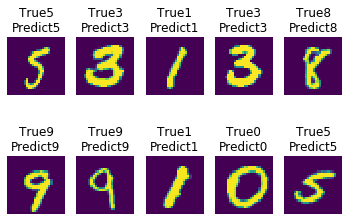

In [9]:
tmp = np.random.randint(0,len(test_images))
xs = train_images[tmp:tmp+10]
ys = train_labels[tmp:tmp+10]
pred = model.predict(xs)
pred_index = np.argmax(pred,axis=-1)
print(ys)
print(pred_index)

for i in range(10):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(xs[i])
    ax.axis('off')
    
    title = 'True' + str(ys[i]) +'\n' + 'Predict' + str(pred_index[i])
    if ys[i] != pred_index[i]:
        title = title + '\n' + 'Not equal'
    ax.set_title(title)
plt.show()